In [1]:
#import pyarrow.feather as feather
import pandas as pd
import numpy as np
#from scipy.io import netcdf
import matplotlib.pyplot as plt 
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
# it is better for visualisation if the columns date type (not int or str)
# when save df to csv, if the column names are date, they are saved as str
def convert_col_to_date(columns):
    
    # convert the columns type
    #columns = df.columns
    new_columns = []
    for col in columns:
        try:
            new_columns.append(pd.to_datetime(col).date())
        except: new_columns.append(col)
    return new_columns

In [4]:
# import freq df
k=3 #sample number
freq_level =  pd.read_csv(f"dataset/modeling/sample{k}/freq_sample.csv").set_index("proj_id")
print(freq_level.shape)
print(" ")
print("details: ")
print(f"daily_freq: {freq_level[freq_level['daily']].shape}")
print(f"mid_weekly_freq: {freq_level[freq_level['mid_weekly']].shape}")
print(f"weekly_freq: {freq_level[freq_level['weekly']].shape}")
print(f"fortnight_freq: {freq_level[freq_level['fortnight']].shape}")
print(f"low_freq_freq: {freq_level[freq_level['low_freq']].shape}")

freq_level.sort_values(["freq", "length"])

(25, 7)
 
details: 
daily_freq: (5, 7)
mid_weekly_freq: (5, 7)
weekly_freq: (5, 7)
fortnight_freq: (5, 7)
low_freq_freq: (5, 7)


,daily,mid_weekly,weekly,fortnight,low_freq,length,freq
proj_id,,,,,,,
NW_110200469,True,False,False,False,False,1356,1
MV_20480008,True,False,False,False,False,2058,1
BB_31519239,True,False,False,False,False,3770,1
NI_200000700,True,False,False,False,False,4659,1
BY_11163,True,False,False,False,False,5962,1
BY_6166,False,True,False,False,False,114,4
NW_80303572,False,True,False,False,False,1203,4
BE_9092,False,True,False,False,False,1771,4
MV_25440602,False,True,False,False,False,2393,4


In [5]:
# import t s and convert into date type
grouped_t_s = pd.read_csv(f"dataset/modeling/sample{k}/sample_t_s.csv").set_index("proj_id")
grouped_t_s.columns = convert_col_to_date(grouped_t_s.columns)
print(grouped_t_s.shape)
grouped_t_s.head()

(25, 6546)


,length,freq,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,...,2012-11-21,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30
proj_id,,,,,,,,,,,,,,,,,,,,,
NW_110200469,1356,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.31000,78.30000,78.30000,78.32000,78.32000,78.3400,78.33000,78.33000,78.31000,78.30000
MV_20480008,2058,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.02000,2.01000,2.01000,2.01000,2.03000,2.0200,2.02000,2.02000,2.03000,2.01000
BB_31519239,3770,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.21000,2.19000,2.19000,2.19000,2.20000,2.1900,NaN,NaN,NaN,NaN
NI_200000700,4659,1,44.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.73000,43.73000,43.73000,43.73000,43.73000,43.7300,43.73000,43.73000,43.73000,43.73000
BY_11163,5962,1,NaN,373.08399,NaN,NaN,NaN,NaN,NaN,NaN,...,370.43615,370.40831,370.41854,370.42508,370.44492,370.4701,370.50575,370.54035,370.57969,370.52173


In [6]:
# import ave_temp 
ave_temp = pd.read_csv(f"dataset/modeling/sample{k}/sample_temp.csv").set_index("proj_id")
ave_temp.columns = convert_col_to_date(ave_temp.columns)
print(ave_temp.shape)
ave_temp.head()


(25, 6546)


,length,freq,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,...,2012-11-21,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30
proj_id,,,,,,,,,,,,,,,,,,,,,
NW_110200469,1356,1,9.0,9.0,-10.0,-58.0,-66.0,-57.0,-76.0,-36.0,...,53.0,80.0,60.0,72.0,104.0,64.0,73.0,38.0,32.0,4.0
MV_20480008,2058,1,17.0,2.0,-13.0,-41.0,-57.0,-67.0,-65.0,-55.0,...,50.0,61.0,40.0,47.0,60.0,68.0,64.0,47.0,47.0,22.0
BB_31519239,3770,1,24.0,-1.0,-12.0,-61.0,-55.0,-77.0,-54.0,-51.0,...,42.0,58.0,29.0,57.0,68.0,61.0,69.0,52.0,44.0,26.0
NI_200000700,4659,1,11.0,7.0,-20.0,-74.0,-77.0,-70.0,-75.0,-37.0,...,45.0,77.0,56.0,53.0,96.0,70.0,68.0,35.0,32.0,12.0
BY_11163,5962,1,2.0,-24.0,-41.0,-98.0,-124.0,-105.0,-100.0,-72.0,...,22.0,35.0,44.0,35.0,64.0,68.0,62.0,50.0,6.0,-10.0


In [7]:
# import the cum_prec 
cum_prec=pd.read_csv(f"dataset/modeling/sample{k}/sample_prec.csv").set_index("proj_id")
cum_prec.columns = convert_col_to_date(cum_prec.columns)
print(cum_prec.shape)
cum_prec.head()

(25, 6546)


,length,freq,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,...,2012-11-21,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30
proj_id,,,,,,,,,,,,,,,,,,,,,
NW_110200469,1356,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,19.0,1.0,28.0,2.0,0.0,1.0,2.0
MV_20480008,2058,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,8.0,5.0,2.0,28.0,1.0,9.0,53.0,0.0
BB_31519239,3770,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,13.0,4.0,6.0,12.0,68.0,164.0,3.0
NI_200000700,4659,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,31.0,1.0,34.0,0.0,0.0,0.0,8.0
BY_11163,5962,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,176.0,155.0,2.0


In [8]:
###########################################################################################################

# func

In [9]:
# create df for a t s (one row in grouped_t_s df)
def create_one_ts_df(row):
    bgr = row.name
    idx = row.dropna().index[2:]
    ts = row[idx]
    temp = ave_temp[idx].loc[bgr]
    prec = cum_prec[idx].loc[bgr]
    df = pd.DataFrame({"ts":ts,"temp": temp,"prec":prec, })
    return df


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


def split_df(reframed):
    # split into train and test sets, 
    values = reframed.values
    n_train = int(len(reframed)*0.8)
    train = values[:n_train, :]
    test = values[n_train:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return train_X, train_y, test_X, test_y


# pick t s

In [10]:
# apply the func
ts1 = grouped_t_s.iloc[14]
print(f"ts length:{ts1[0]}, freq: {ts1[1]}")
df = create_one_ts_df(ts1)
print(df.shape)

ts length:855.0, freq: 7.0
(851, 3)


Text(0.5, 1.0, 'prec')

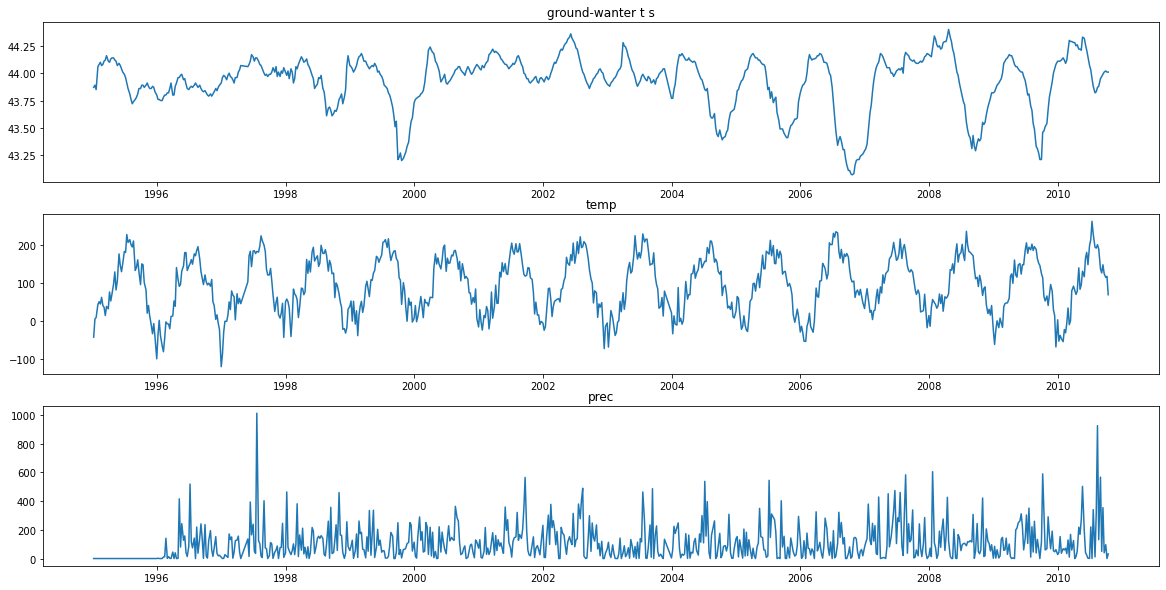

In [11]:
# plot a t s with its predictors
fig, axs = plt.subplots(3,1, figsize=(20,10))
#fig.suptitle('Vertically stacked subplots')
a,b = 0,750
axs[0].plot(df["ts"][a:b])
axs[0].set_title('ground-wanter t s')
axs[1].plot(df["temp"][a:b])
axs[1].set_title('temp')
axs[2].plot(df["prec"][a:b])
axs[2].set_title('prec')

# apply

In [13]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var1(t)
1,0.588236,0.202991,0.0,0.602942
2,0.602942,0.327103,0.0,0.573530
3,0.573530,0.338692,0.0,0.727942
4,0.727942,0.428785,0.0,0.742647
5,0.742647,0.447103,0.0,0.757353


(850, 4)
input to be 3D [samples, timesteps(lag, features]

train: (680, 1, 3) , (680,) ,test: (170, 1, 3) , (170,)
Epoch 1/50
10/10 - 3s - loss: 0.5660 - val_loss: 0.5950
Epoch 2/50
10/10 - 0s - loss: 0.4973 - val_loss: 0.5212
Epoch 3/50
10/10 - 0s - loss: 0.4283 - val_loss: 0.4462
Epoch 4/50
10/10 - 0s - loss: 0.3584 - val_loss: 0.3674
Epoch 5/50
10/10 - 0s - loss: 0.2889 - val_loss: 0.2875
Epoch 6/50
10/10 - 0s - loss: 0.2204 - val_loss: 0.2160
Epoch 7/50
10/10 - 0s - loss: 0.1587 - val_loss: 0.1682
Epoch 8/50
10/10 - 0s - loss: 0.1247 - val_loss: 0.1523
Epoch 9/50
10/10 - 0s - loss: 0.1197 - val_loss: 0.1488
Epoch 10/50
10/10 - 0s - loss: 0.1173 - val_loss: 0.1441
Epoch 11/50
10/10 - 0s - loss: 0.1126 - val_loss: 0.1409
Epoch 12/50
10/10 - 0s - loss: 0.1092 - val_loss: 0.1369
Epoch 13/50
10/10 - 0s - loss: 0.1058 - val_loss: 0.1317
Epoch 14/50
10/10 - 0s - loss: 0.1023 - val_loss: 0.1266
Epoch 15/50
10/10 - 0s - loss: 0.0990 - val_loss: 0.1220
Epoch 16/50
10/10 - 0s - loss: 0.0955 

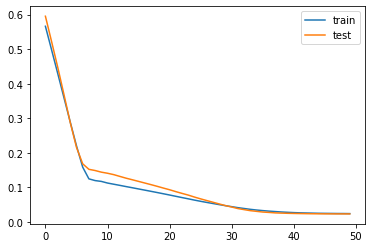

Test RMSE: 0.047


In [12]:
###############################################################

# convert the df to match lstm data
# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[-2:], axis=1, inplace=True)
print(reframed.shape)
################################################################

train_X, train_y, test_X, test_y= split_df(reframed)
print("input to be 3D [samples, timesteps(lag, features]\n")
print(f"train: {train_X.shape} , {train_y.shape} ,test: {test_X.shape} , {test_y.shape}")
####################################################################

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
##############################################################################

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
##################################################################################

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = scaler.inverse_transform(np.concatenate((yhat, test_X[:, 1:]), axis=1))[:,0]
#inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = scaler.inverse_transform(np.concatenate((test_y, test_X[:, 1:]), axis=1))[:,0]
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
#####################################################################



In [22]:
np.std(ts1.dropna())

12.205118126426845

# RMSE for sample2 t s[9] : 0.014

<AxesSubplot:>

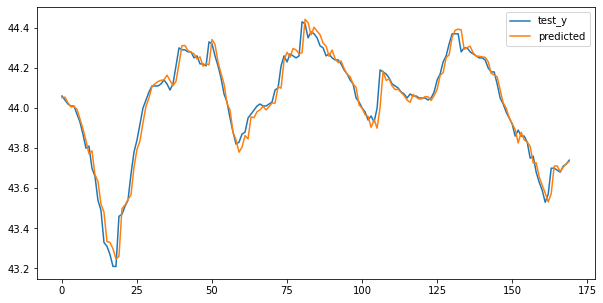

In [14]:
fd = pd.DataFrame([inv_y, inv_yhat]).T[:]
fd.columns = ["test_y", "predicted"]
fd.plot(figsize=(10,5))

In [15]:
def f(df):
    # convert the df to match lstm data
    # load dataset
    values = df.values
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    reframed.drop(reframed.columns[-2:], axis=1, inplace=True)
    #print(reframed.shape)
    ################################################################

    train_X, train_y, test_X, test_y= split_df(reframed)
    #print("input to be 3D [samples, timesteps(lag, features]\n")
    #print(f"train: {train_X.shape} , {train_y.shape} ,test: {test_X.shape} , {test_y.shape}")
    ####################################################################

    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    ##############################################################################

    # plot history
    #plt.plot(history.history['loss'], label='train')
    #plt.plot(history.history['val_loss'], label='test')
    #plt.legend()
    #plt.show()
    ##################################################################################

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = scaler.inverse_transform(np.concatenate((yhat, test_X[:, 1:]), axis=1))[:,0]
    #inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    #inv_yhat = scaler.inverse_transform(inv_yhat)
    #inv_yhat = inv_yhat[:,0]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = scaler.inverse_transform(np.concatenate((test_y, test_X[:, 1:]), axis=1))[:,0]
    #inv_y = scaler.inverse_transform(inv_y)
    #inv_y = inv_y[:,0]

    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    #print('Test RMSE: %.3f' % rmse)
    return rmse
    #####################################################################


In [16]:
err = []
for i in range(0,26):
    ts = grouped_t_s.iloc[i]
    df = create_one_ts_df(ts)
    #print(df.shape)
    rmse = f(df)
    err.append(rmse)
    


Epoch 1/50
15/15 - 2s - loss: 0.4101 - val_loss: 0.3068
Epoch 2/50
15/15 - 0s - loss: 0.3203 - val_loss: 0.2168
Epoch 3/50
15/15 - 0s - loss: 0.2460 - val_loss: 0.1636
Epoch 4/50
15/15 - 0s - loss: 0.2045 - val_loss: 0.1492
Epoch 5/50
15/15 - 0s - loss: 0.1828 - val_loss: 0.1420
Epoch 6/50
15/15 - 0s - loss: 0.1697 - val_loss: 0.1366
Epoch 7/50
15/15 - 0s - loss: 0.1596 - val_loss: 0.1312
Epoch 8/50
15/15 - 0s - loss: 0.1512 - val_loss: 0.1254
Epoch 9/50
15/15 - 0s - loss: 0.1432 - val_loss: 0.1192
Epoch 10/50
15/15 - 0s - loss: 0.1353 - val_loss: 0.1128
Epoch 11/50
15/15 - 0s - loss: 0.1272 - val_loss: 0.1063
Epoch 12/50
15/15 - 0s - loss: 0.1189 - val_loss: 0.0994
Epoch 13/50
15/15 - 0s - loss: 0.1103 - val_loss: 0.0921
Epoch 14/50
15/15 - 0s - loss: 0.1013 - val_loss: 0.0845
Epoch 15/50
15/15 - 0s - loss: 0.0919 - val_loss: 0.0765
Epoch 16/50
15/15 - 0s - loss: 0.0820 - val_loss: 0.0684
Epoch 17/50
15/15 - 0s - loss: 0.0716 - val_loss: 0.0602
Epoch 18/50
15/15 - 0s - loss: 0.0610 - 

Epoch 46/50
42/42 - 0s - loss: 0.0129 - val_loss: 0.0165
Epoch 47/50
42/42 - 0s - loss: 0.0128 - val_loss: 0.0165
Epoch 48/50
42/42 - 0s - loss: 0.0128 - val_loss: 0.0165
Epoch 49/50
42/42 - 0s - loss: 0.0128 - val_loss: 0.0165
Epoch 50/50
42/42 - 0s - loss: 0.0128 - val_loss: 0.0165
Epoch 1/50
52/52 - 3s - loss: 0.2106 - val_loss: 0.1174
Epoch 2/50
52/52 - 0s - loss: 0.1226 - val_loss: 0.1173
Epoch 3/50
52/52 - 0s - loss: 0.1105 - val_loss: 0.1040
Epoch 4/50
52/52 - 0s - loss: 0.0975 - val_loss: 0.0886
Epoch 5/50
52/52 - 0s - loss: 0.0824 - val_loss: 0.0694
Epoch 6/50
52/52 - 0s - loss: 0.0642 - val_loss: 0.0456
Epoch 7/50
52/52 - 0s - loss: 0.0447 - val_loss: 0.0261
Epoch 8/50
52/52 - 0s - loss: 0.0279 - val_loss: 0.0136
Epoch 9/50
52/52 - 0s - loss: 0.0169 - val_loss: 0.0132
Epoch 10/50
52/52 - 0s - loss: 0.0112 - val_loss: 0.0092
Epoch 11/50
52/52 - 0s - loss: 0.0090 - val_loss: 0.0069
Epoch 12/50
52/52 - 0s - loss: 0.0080 - val_loss: 0.0056
Epoch 13/50
52/52 - 0s - loss: 0.0080 - 

Epoch 42/50
1/1 - 0s - loss: 0.0426 - val_loss: 0.0934
Epoch 43/50
1/1 - 0s - loss: 0.0425 - val_loss: 0.0934
Epoch 44/50
1/1 - 0s - loss: 0.0424 - val_loss: 0.0934
Epoch 45/50
1/1 - 0s - loss: 0.0422 - val_loss: 0.0932
Epoch 46/50
1/1 - 0s - loss: 0.0420 - val_loss: 0.0930
Epoch 47/50
1/1 - 0s - loss: 0.0419 - val_loss: 0.0926
Epoch 48/50
1/1 - 0s - loss: 0.0417 - val_loss: 0.0921
Epoch 49/50
1/1 - 0s - loss: 0.0415 - val_loss: 0.0916
Epoch 50/50
1/1 - 0s - loss: 0.0414 - val_loss: 0.0910
Epoch 1/50
14/14 - 2s - loss: 0.2944 - val_loss: 0.2588
Epoch 2/50
14/14 - 0s - loss: 0.2008 - val_loss: 0.1570
Epoch 3/50
14/14 - 0s - loss: 0.1104 - val_loss: 0.0692
Epoch 4/50
14/14 - 0s - loss: 0.0733 - val_loss: 0.0559
Epoch 5/50
14/14 - 0s - loss: 0.0791 - val_loss: 0.0560
Epoch 6/50
14/14 - 0s - loss: 0.0795 - val_loss: 0.0535
Epoch 7/50
14/14 - 0s - loss: 0.0756 - val_loss: 0.0527
Epoch 8/50
14/14 - 0s - loss: 0.0726 - val_loss: 0.0520
Epoch 9/50
14/14 - 0s - loss: 0.0710 - val_loss: 0.0512
E

Epoch 37/50
27/27 - 0s - loss: 0.0138 - val_loss: 0.0179
Epoch 38/50
27/27 - 0s - loss: 0.0149 - val_loss: 0.0154
Epoch 39/50
27/27 - 0s - loss: 0.0136 - val_loss: 0.0096
Epoch 40/50
27/27 - 0s - loss: 0.0119 - val_loss: 0.0068
Epoch 41/50
27/27 - 0s - loss: 0.0128 - val_loss: 0.0108
Epoch 42/50
27/27 - 0s - loss: 0.0121 - val_loss: 0.0087
Epoch 43/50
27/27 - 0s - loss: 0.0134 - val_loss: 0.0170
Epoch 44/50
27/27 - 0s - loss: 0.0143 - val_loss: 0.0138
Epoch 45/50
27/27 - 0s - loss: 0.0126 - val_loss: 0.0082
Epoch 46/50
27/27 - 0s - loss: 0.0119 - val_loss: 0.0077
Epoch 47/50
27/27 - 0s - loss: 0.0131 - val_loss: 0.0144
Epoch 48/50
27/27 - 0s - loss: 0.0132 - val_loss: 0.0125
Epoch 49/50
27/27 - 0s - loss: 0.0124 - val_loss: 0.0102
Epoch 50/50
27/27 - 0s - loss: 0.0128 - val_loss: 0.0140
Epoch 1/50
31/31 - 2s - loss: 0.3316 - val_loss: 0.3369
Epoch 2/50
31/31 - 0s - loss: 0.1542 - val_loss: 0.1198
Epoch 3/50
31/31 - 0s - loss: 0.1084 - val_loss: 0.0823
Epoch 4/50
31/31 - 0s - loss: 0.11

6/6 - 0s - loss: 0.0846 - val_loss: 0.0818
Epoch 35/50
6/6 - 0s - loss: 0.0837 - val_loss: 0.0805
Epoch 36/50
6/6 - 0s - loss: 0.0828 - val_loss: 0.0794
Epoch 37/50
6/6 - 0s - loss: 0.0820 - val_loss: 0.0785
Epoch 38/50
6/6 - 0s - loss: 0.0812 - val_loss: 0.0778
Epoch 39/50
6/6 - 0s - loss: 0.0804 - val_loss: 0.0769
Epoch 40/50
6/6 - 0s - loss: 0.0796 - val_loss: 0.0758
Epoch 41/50
6/6 - 0s - loss: 0.0790 - val_loss: 0.0746
Epoch 42/50
6/6 - 0s - loss: 0.0786 - val_loss: 0.0740
Epoch 43/50
6/6 - 0s - loss: 0.0782 - val_loss: 0.0737
Epoch 44/50
6/6 - 0s - loss: 0.0777 - val_loss: 0.0735
Epoch 45/50
6/6 - 0s - loss: 0.0773 - val_loss: 0.0733
Epoch 46/50
6/6 - 0s - loss: 0.0769 - val_loss: 0.0728
Epoch 47/50
6/6 - 0s - loss: 0.0765 - val_loss: 0.0721
Epoch 48/50
6/6 - 0s - loss: 0.0761 - val_loss: 0.0714
Epoch 49/50
6/6 - 0s - loss: 0.0758 - val_loss: 0.0708
Epoch 50/50
6/6 - 0s - loss: 0.0757 - val_loss: 0.0708
Epoch 1/50
7/7 - 2s - loss: 0.3356 - val_loss: 0.2573
Epoch 2/50
7/7 - 0s - l

Epoch 33/50
10/10 - 0s - loss: 0.0329 - val_loss: 0.0284
Epoch 34/50
10/10 - 0s - loss: 0.0315 - val_loss: 0.0271
Epoch 35/50
10/10 - 0s - loss: 0.0303 - val_loss: 0.0263
Epoch 36/50
10/10 - 0s - loss: 0.0293 - val_loss: 0.0256
Epoch 37/50
10/10 - 0s - loss: 0.0283 - val_loss: 0.0252
Epoch 38/50
10/10 - 0s - loss: 0.0275 - val_loss: 0.0248
Epoch 39/50
10/10 - 0s - loss: 0.0269 - val_loss: 0.0245
Epoch 40/50
10/10 - 0s - loss: 0.0264 - val_loss: 0.0243
Epoch 41/50
10/10 - 0s - loss: 0.0260 - val_loss: 0.0240
Epoch 42/50
10/10 - 0s - loss: 0.0256 - val_loss: 0.0239
Epoch 43/50
10/10 - 0s - loss: 0.0252 - val_loss: 0.0237
Epoch 44/50
10/10 - 0s - loss: 0.0251 - val_loss: 0.0237
Epoch 45/50
10/10 - 0s - loss: 0.0249 - val_loss: 0.0236
Epoch 46/50
10/10 - 0s - loss: 0.0248 - val_loss: 0.0236
Epoch 47/50
10/10 - 0s - loss: 0.0245 - val_loss: 0.0235
Epoch 48/50
10/10 - 0s - loss: 0.0245 - val_loss: 0.0235
Epoch 49/50
10/10 - 0s - loss: 0.0244 - val_loss: 0.0235
Epoch 50/50
10/10 - 0s - loss: 

Epoch 32/50
5/5 - 0s - loss: 0.0898 - val_loss: 0.0887
Epoch 33/50
5/5 - 0s - loss: 0.0887 - val_loss: 0.0880
Epoch 34/50
5/5 - 0s - loss: 0.0878 - val_loss: 0.0874
Epoch 35/50
5/5 - 0s - loss: 0.0868 - val_loss: 0.0866
Epoch 36/50
5/5 - 0s - loss: 0.0859 - val_loss: 0.0860
Epoch 37/50
5/5 - 0s - loss: 0.0850 - val_loss: 0.0854
Epoch 38/50
5/5 - 0s - loss: 0.0841 - val_loss: 0.0849
Epoch 39/50
5/5 - 0s - loss: 0.0832 - val_loss: 0.0844
Epoch 40/50
5/5 - 0s - loss: 0.0824 - val_loss: 0.0839
Epoch 41/50
5/5 - 0s - loss: 0.0816 - val_loss: 0.0834
Epoch 42/50
5/5 - 0s - loss: 0.0808 - val_loss: 0.0829
Epoch 43/50
5/5 - 0s - loss: 0.0801 - val_loss: 0.0825
Epoch 44/50
5/5 - 0s - loss: 0.0794 - val_loss: 0.0821
Epoch 45/50
5/5 - 0s - loss: 0.0788 - val_loss: 0.0817
Epoch 46/50
5/5 - 0s - loss: 0.0781 - val_loss: 0.0813
Epoch 47/50
5/5 - 0s - loss: 0.0774 - val_loss: 0.0810
Epoch 48/50
5/5 - 0s - loss: 0.0768 - val_loss: 0.0807
Epoch 49/50
5/5 - 0s - loss: 0.0761 - val_loss: 0.0804
Epoch 50/5

Epoch 19/50
2/2 - 0s - loss: 0.1885 - val_loss: 0.2440
Epoch 20/50
2/2 - 0s - loss: 0.1831 - val_loss: 0.2349
Epoch 21/50
2/2 - 0s - loss: 0.1781 - val_loss: 0.2271
Epoch 22/50
2/2 - 0s - loss: 0.1736 - val_loss: 0.2195
Epoch 23/50
2/2 - 0s - loss: 0.1698 - val_loss: 0.2124
Epoch 24/50
2/2 - 0s - loss: 0.1668 - val_loss: 0.2058
Epoch 25/50
2/2 - 0s - loss: 0.1638 - val_loss: 0.1997
Epoch 26/50
2/2 - 0s - loss: 0.1609 - val_loss: 0.1938
Epoch 27/50
2/2 - 0s - loss: 0.1586 - val_loss: 0.1882
Epoch 28/50
2/2 - 0s - loss: 0.1569 - val_loss: 0.1830
Epoch 29/50
2/2 - 0s - loss: 0.1553 - val_loss: 0.1783
Epoch 30/50
2/2 - 0s - loss: 0.1539 - val_loss: 0.1739
Epoch 31/50
2/2 - 0s - loss: 0.1527 - val_loss: 0.1700
Epoch 32/50
2/2 - 0s - loss: 0.1516 - val_loss: 0.1664
Epoch 33/50
2/2 - 0s - loss: 0.1506 - val_loss: 0.1636
Epoch 34/50
2/2 - 0s - loss: 0.1498 - val_loss: 0.1614
Epoch 35/50
2/2 - 0s - loss: 0.1491 - val_loss: 0.1596
Epoch 36/50
2/2 - 0s - loss: 0.1484 - val_loss: 0.1582
Epoch 37/5

Epoch 5/50
3/3 - 0s - loss: 0.2250 - val_loss: 0.2142
Epoch 6/50
3/3 - 0s - loss: 0.2094 - val_loss: 0.2012
Epoch 7/50
3/3 - 0s - loss: 0.1964 - val_loss: 0.1903
Epoch 8/50
3/3 - 0s - loss: 0.1855 - val_loss: 0.1827
Epoch 9/50
3/3 - 0s - loss: 0.1762 - val_loss: 0.1781
Epoch 10/50
3/3 - 0s - loss: 0.1691 - val_loss: 0.1751
Epoch 11/50
3/3 - 0s - loss: 0.1641 - val_loss: 0.1739
Epoch 12/50
3/3 - 0s - loss: 0.1602 - val_loss: 0.1739
Epoch 13/50
3/3 - 0s - loss: 0.1570 - val_loss: 0.1750
Epoch 14/50
3/3 - 0s - loss: 0.1546 - val_loss: 0.1757
Epoch 15/50
3/3 - 0s - loss: 0.1532 - val_loss: 0.1764
Epoch 16/50
3/3 - 0s - loss: 0.1523 - val_loss: 0.1768
Epoch 17/50
3/3 - 0s - loss: 0.1516 - val_loss: 0.1769
Epoch 18/50
3/3 - 0s - loss: 0.1509 - val_loss: 0.1768
Epoch 19/50
3/3 - 0s - loss: 0.1502 - val_loss: 0.1766
Epoch 20/50
3/3 - 0s - loss: 0.1496 - val_loss: 0.1760
Epoch 21/50
3/3 - 0s - loss: 0.1488 - val_loss: 0.1752
Epoch 22/50
3/3 - 0s - loss: 0.1480 - val_loss: 0.1743
Epoch 23/50
3/3

IndexError: single positional indexer is out-of-bounds

# plot RMSE for all t s in the sample

Text(0, 0.5, 'RMSE ')

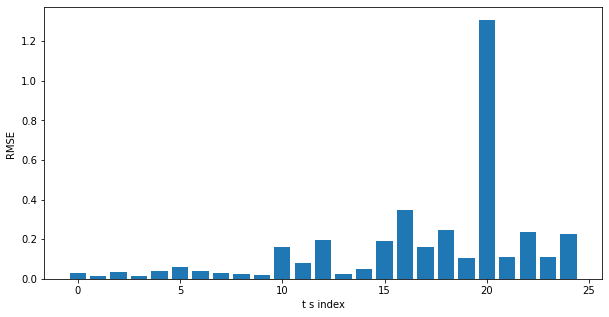

In [17]:
# plot err (rmse) for all t s in the smple 
plt.figure(figsize=(10,5))
plt.bar(range(0,len(err)), err[:])
plt.xlabel("t s index")
plt.ylabel("RMSE ")


In [ ]:
freq_level

In [18]:
# apply the func
ts1 = grouped_t_s.iloc[20]
print(f"ts length:{ts1[0]}, freq: {ts1[1]}")
df = create_one_ts_df(ts1)
print(df.shape)


ts length:183.0, freq: 30.0
(182, 3)


In [19]:
df

,ts,temp,prec
1995-01-03,196.04,-34.0000,0.0
1995-02-07,197.55,28.9000,0.0
1995-03-07,196.08,44.1333,0.0
1995-04-04,196.43,40.9333,0.0
1995-05-02,195.43,83.7000,0.0
...,...,...,...
2012-03-30,193.82,75.6000,150.0
2012-05-10,193.59,106.4000,350.0
2012-06-13,193.52,141.0667,722.0
2012-06-28,193.54,139.9333,870.0


In [ ]:
#########################

In [ ]:
##########################

In [ ]:
# apply the func
ts1 = grouped_t_s.iloc[14]
print(f"ts length:{ts1[0]}, freq: {ts1[1]}")
df = create_one_ts_df(ts1)
print(df.shape)


###############################################################

# convert the df to match lstm data
# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[-2:], axis=1, inplace=True)
print(reframed.shape)
################################################################

train_X, train_y, test_X, test_y= split_df(reframed)
print("input to be 3D [samples, timesteps(lag, features]\n")
print(f"train: {train_X.shape} , {train_y.shape} ,test: {test_X.shape} , {test_y.shape}")
####################################################################

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
##############################################################################

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
##################################################################################


In [ ]:
train_predict = model.predict(train_X)
#train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
# invert scaling for forecast
#inv_train_predict = scaler.inverse_transform(np.concatenate((train_predict, train_X[:, 1:]), axis=1))[:,0]
train_mae_loss = np.mean(np.abs(train_predict - train_y))#, axis=1)
plt.figure(figsize=(10,15))
plt.hist(train_mae_loss, bins=100)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')


In [ ]:
train_mae_loss

In [ ]:

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = scaler.inverse_transform(np.concatenate((yhat, test_X[:, 1:]), axis=1))[:,0]
#inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = scaler.inverse_transform(np.concatenate((test_y, test_X[:, 1:]), axis=1))[:,0]
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
#####################################################################




In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = scaler.inverse_transform(np.concatenate((yhat, test_X[:, 1:]), axis=1))[:,0]
#inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = scaler.inverse_transform(np.concatenate((test_y, test_X[:, 1:]), axis=1))[:,0]
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]

